In [1]:
import numpy as np
import cv2
import keras
from keras.datasets import fashion_mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [3]:
print((Y_train.shape))

(60000,)


In [4]:
print(X_train.shape[0])
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = to_categorical(np.array(Y_train))
Y_test = to_categorical(np.array(Y_test))
print((Y_train.shape))


60000
(60000, 10)


In [85]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
def create_model():
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(2500, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model



In [86]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_409 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_410 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_137 (MaxPoolin (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_273 (Dropout)        (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_411 (Conv2D)          (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_412 (Conv2D)          (None, 8, 8, 64)          36928     
_________________________________________________________________
batch_normalization_85 (Batc (None, 8, 8, 64)          32        
__________

In [118]:
def train():
    model = create_model()
    model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, Y_train, batch_size=64, epochs=50, verbose=1,shuffle=False, validation_split=0.3)
    model.save_weights('./model/fashion_mnist.h5')

train()

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 12s 282us/step - loss: 0.7443 - acc: 0.7305 - val_loss: 0.4738 - val_acc: 0.8273
Epoch 2/50
42000/42000 [==============================] - 8s 198us/step - loss: 0.4332 - acc: 0.8430 - val_loss: 0.3666 - val_acc: 0.8647
Epoch 3/50
42000/42000 [==============================] - 8s 197us/step - loss: 0.3580 - acc: 0.8714 - val_loss: 0.3031 - val_acc: 0.8887
Epoch 4/50
42000/42000 [==============================] - 8s 198us/step - loss: 0.3232 - acc: 0.8841 - val_loss: 0.2856 - val_acc: 0.8955
Epoch 5/50
42000/42000 [==============================] - 8s 197us/step - loss: 0.2965 - acc: 0.8946 - val_loss: 0.2949 - val_acc: 0.8918
Epoch 6/50
42000/42000 [==============================] - 8s 197us/step - loss: 0.2850 - acc: 0.8971 - val_loss: 0.2805 - val_acc: 0.8979
Epoch 7/50
42000/42000 [==============================] - 8s 198us/step - loss: 0.2642 - acc: 0.9042 - val_loss: 0.2843 -

In [119]:
def evaluation():
    model = create_model()
    model.load_weights('./model/fashion_mnist.h5')
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    score = model.evaluate(X_test, Y_test, verbose=1)
    print('accuracy: ',score[1]*100)
    print('loss: ',score[0])
    
evaluation()

10000/10000 [==============================] - 4s 390us/step
accuracy:  92.66
loss:  0.270661384091


In [120]:
def label(index):
    if index == 0:
        print('T-shirt/ Top')
    if index == 1:
        print('Trousers')
    if index == 2:
        print('Pullover')
    if index == 3:
        print('Dress')
    if index == 4:
        print('Coat')
    if index == 5:
        print('Sandel')
    if index == 6:
        print('Shirt')
    if index == 7:
        print('Sneakers')
    if index == 8:
        print('Bag')
    if index == 9:
        print('Ankel Boots')
    

(1, 28, 28, 1)
Shirt
predicted label:  6


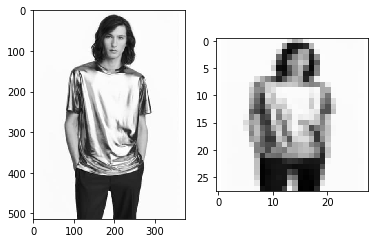

In [135]:
model = create_model()
model.load_weights('./model/fashion_mnist.h5')

# print('orignal label: ',np.argmax(Y_test[960]))
# img = X_test[960]

imgo = cv2.imread('./my_data/12.jpg')
imgo = cv2.cvtColor(imgo, cv2.COLOR_BGR2GRAY)
print(img.shape)
img = cv2.resize(imgo,(28,28), interpolation = cv2.INTER_AREA)



# img = img.reshape((28,28))

fig, (ax1,ax2) = plt.subplots(1,2)
ax2.imshow(img, cmap='gray')
ax1.imshow(imgo, cmap='gray')

img = img.reshape(-1,28,28,1)
prediction = model.predict(img)



label(np.argmax(prediction))
print('predicted label: ', np.argmax(prediction))

# print(prediction)
